In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import seaborn as sns

In [ ]:
N = 10  # Nodos
k = 2  # conexiones promedio por nodo (max is N-1)
p = k / N

<AxesSubplot:>

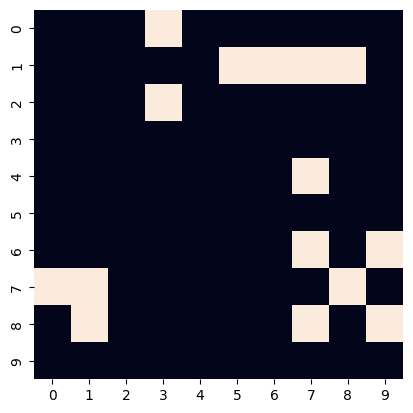

In [ ]:
mat_C = bernoulli.rvs(p, size=(N, N))
np.fill_diagonal(mat_C, 0)
sns.heatmap(mat_C, cbar=False, annot=False, square=True)

In [ ]:
# Adjacency matrix
mat_C

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
# edge list
edge_list = [(u,v) for u,v in zip(*np.where(mat_C))]
edge_list

[(0, 3),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (2, 3),
 (4, 7),
 (6, 7),
 (6, 9),
 (7, 0),
 (7, 1),
 (7, 8),
 (8, 1),
 (8, 7),
 (8, 9)]

In [ ]:
# Adjacency list
adj_list = {ni: np.where(mat_C[ni])[0] for ni in range(N)}
adj_list

{0: array([3]),
 1: array([5, 6, 7, 8]),
 2: array([3]),
 3: array([], dtype=int64),
 4: array([7]),
 5: array([], dtype=int64),
 6: array([7, 9]),
 7: array([0, 1, 8]),
 8: array([1, 7, 9]),
 9: array([], dtype=int64)}

In [ ]:
mat_C[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
def draw_edge(a, b, hw = 0):
    # Connects points a and b with an arrow: a-->b
    plt.arrow(a[0], a[1], b[0] - a[0], b[1] - a[1], 
              head_width = hw, length_includes_head = True, color="green"
              )

In [ ]:
xy = np.random.random(size=(N, 2))
xy

array([[0.87357364, 0.95019149],
       [0.38768512, 0.40410378],
       [0.3909992 , 0.64275271],
       [0.56619967, 0.26569756],
       [0.01320297, 0.46820826],
       [0.74461723, 0.09523146],
       [0.79945195, 0.45944009],
       [0.70899726, 0.36724724],
       [0.38176373, 0.35065635],
       [0.51415535, 0.65274004]])

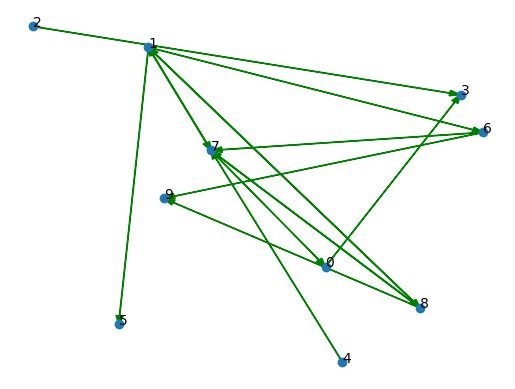

In [ ]:
xy = np.random.random(size=(N, 2))

plt.plot(xy[:,0], xy[:,1], 'o')

[plt.text(xy[i,0], xy[i,1], str(i)) for i in range(N)]
[draw_edge(xy[uv[0]], xy[uv[1]], hw=0.015) for uv in edge_list];
plt.axis('off');

(-1.1000146946313074,
 1.1003085872574536,
 -1.073662167924669,
 1.073662167924669)

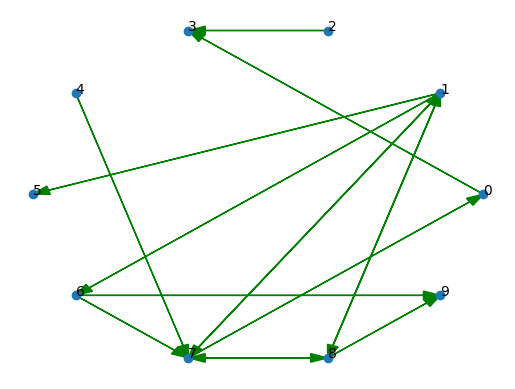

In [ ]:
angle = np.linspace(0, 2*np.pi, 10, endpoint=False)
x = np.cos(angle)
y = np.sin(angle)
plt.plot(x, y, 'o')
[plt.text(x[i], y[i], str(i)) for i in range(N)];
[draw_edge((x[uv[0]], y[uv[0]]), (x[uv[1]], y[uv[1]]), hw=0.05) for uv in edge_list];
plt.axis('off')

In [ ]:
N=11
k = 4
C = []
for u in range(N):
    C += [[]]
    for ki in range(k//2):
        C[u] += [u+ki+1, u-(ki+1)]
C = np.array(C)
C

array([[ 1, -1,  2, -2],
       [ 2,  0,  3, -1],
       [ 3,  1,  4,  0],
       [ 4,  2,  5,  1],
       [ 5,  3,  6,  2],
       [ 6,  4,  7,  3],
       [ 7,  5,  8,  4],
       [ 8,  6,  9,  5],
       [ 9,  7, 10,  6],
       [10,  8, 11,  7],
       [11,  9, 12,  8]])

In [ ]:
C[np.where(C < 0)] += N
C[np.where(C >= N)] -= N
C

array([[ 1, 10,  2,  9],
       [ 2,  0,  3, 10],
       [ 3,  1,  4,  0],
       [ 4,  2,  5,  1],
       [ 5,  3,  6,  2],
       [ 6,  4,  7,  3],
       [ 7,  5,  8,  4],
       [ 8,  6,  9,  5],
       [ 9,  7, 10,  6],
       [10,  8,  0,  7],
       [ 0,  9,  1,  8]])

In [ ]:
edge_list = []
for ni in range(N): 
    for v in C[ni]:
        edge_list += [(ni, v)]
edge_list

[(0, 1),
 (0, 10),
 (0, 2),
 (0, 9),
 (1, 2),
 (1, 0),
 (1, 3),
 (1, 10),
 (2, 3),
 (2, 1),
 (2, 4),
 (2, 0),
 (3, 4),
 (3, 2),
 (3, 5),
 (3, 1),
 (4, 5),
 (4, 3),
 (4, 6),
 (4, 2),
 (5, 6),
 (5, 4),
 (5, 7),
 (5, 3),
 (6, 7),
 (6, 5),
 (6, 8),
 (6, 4),
 (7, 8),
 (7, 6),
 (7, 9),
 (7, 5),
 (8, 9),
 (8, 7),
 (8, 10),
 (8, 6),
 (9, 10),
 (9, 8),
 (9, 0),
 (9, 7),
 (10, 0),
 (10, 9),
 (10, 1),
 (10, 8)]

(-1.083860491424085,
 1.102224900386843,
 -1.1042827015632057,
 1.1042827015632057)

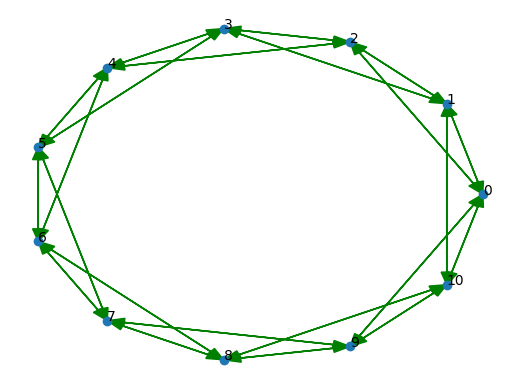

In [ ]:
angle = np.linspace(0, 2*np.pi, N, endpoint=False)
x = np.cos(angle)
y = np.sin(angle)
plt.plot(x, y, 'o')
[plt.text(x[i], y[i], str(i)) for i in range(N)];
[draw_edge((x[uv[0]], y[uv[0]]), (x[uv[1]], y[uv[1]]), hw=0.05) for uv in edge_list];
plt.axis('off')

<AxesSubplot:>

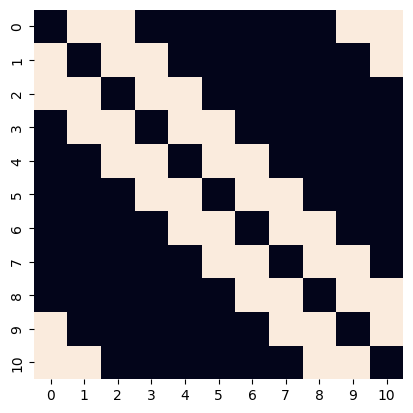

In [ ]:
adj_matrix = np.zeros((N, N), dtype='int')
for ni, v in enumerate(C):
    for vi in v:
        adj_matrix[ni][vi] = 1
sns.heatmap(adj_matrix, cbar=False, annot=False, square=True)

In [ ]:
C

array([[ 1, 10,  2,  9],
       [ 2,  0,  3, 10],
       [ 3,  1,  4,  0],
       [ 4,  2,  5,  1],
       [ 5,  3,  6,  2],
       [ 6,  4,  7,  3],
       [ 7,  5,  8,  4],
       [ 8,  6,  9,  5],
       [ 9,  7, 10,  6],
       [10,  8,  0,  7],
       [ 0,  9,  1,  8]])

In [ ]:
N=11
k = 4
C = []
for u in range(N):
    C += [[]]
    for ki in range(k//2):
        C[u] += [u+ki+1, u-(ki+1)]
C = np.array(C)
C[np.where(C < 0)] += N
C[np.where(C >= N)] -= N

R = C.copy()

omega = 0.1  # rewire 10% of the connections
all_nodes = set(range(N))

for node in range(N):
    for ki in range(k):
        # rewire
        if np.random.random() < omega:
            available_nodes = list(all_nodes - set(list(C[node]) + [node]))
            C[node][ki] = np.random.choice(available_nodes)
C

array([[ 1, 10,  2,  9],
       [ 2,  0,  3, 10],
       [ 3,  1,  4,  0],
       [ 4,  2,  5,  1],
       [ 5,  3,  1,  2],
       [ 6,  4,  7,  3],
       [ 7,  5,  8,  4],
       [ 8,  6,  3,  5],
       [ 9,  7,  4,  6],
       [10,  8,  0,  7],
       [ 0,  9,  1,  8]])

<AxesSubplot:>

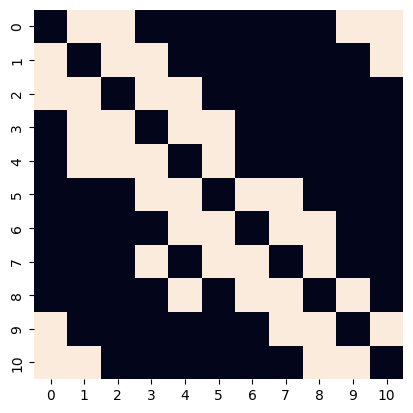

In [ ]:
adj_matrix = np.zeros((N, N), dtype='int')
for ni, v in enumerate(C):
    for vi in v:
        adj_matrix[ni][vi] = 1
sns.heatmap(adj_matrix, cbar=False, annot=False, square=True)

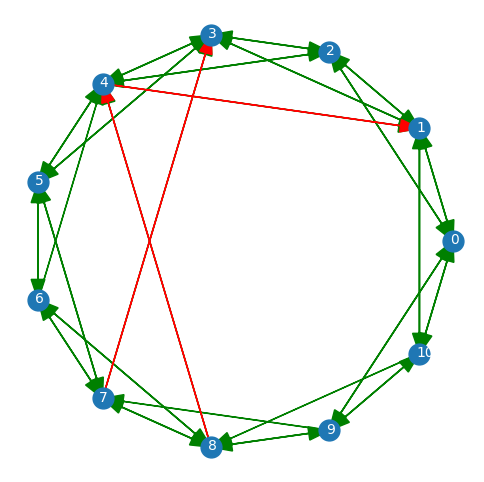

In [ ]:
def draw_edge(a, b, ni, nj, hw=0, color='green'):
    # Connects points a and b with an arrow: a-->b
    plt.arrow(a[0], a[1], b[0] - a[0], b[1] - a[1], 
              head_width = hw, length_includes_head = True, color=color
              )

def plot_circular_layout(adj_list, hw=0.0, rewired_arcs=None):

    t = np.linspace(0, 2*np.pi, N, endpoint=False)

    x = np.cos(t)
    y = np.sin(t)

    plt.figure(figsize=(6,6))
    plt.plot(x, y, '.', ms=30)
    plt.axis('off')
    for i in range(N):
        plt.text(x[i]-0.015, y[i]-0.015, i, c='w')
    e = [draw_edge([x[a], y[a]], [x[b], y[b]], a, b, hw) 
         for a in adj_list for b in adj_list[a] if len(adj_list[a])]
    
    if rewired_arcs is not None:
        e = [draw_edge([x[a], y[a]], [x[b], y[b]], a, b, 0.06, color="red") 
         for a in rewired_arcs for b in rewired_arcs[a] if len(rewired_arcs[a])]

adj_list = {node: neighbors for node, neighbors in enumerate(C)}

rewired_arcs = {i: list(set(C[i])-set(R[i])) for i in range(N)}

plot_circular_layout(adj_list, hw=0.065, rewired_arcs=rewired_arcs)

Check: https://arxiv.org/pdf/cond-mat/0603396.pdf

In [ ]:
x = bernoulli.rvs(p=0.5, size=N)  # neural states
S = bernoulli.rvs(p=0.5, size=(N, k))*2-1  # (C) connections weihgts
x, S

(array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0]),
 array([[ 1,  1,  1, -1],
        [ 1, -1,  1, -1],
        [-1, -1,  1,  1],
        [-1, -1,  1, -1],
        [ 1, -1, -1,  1],
        [-1,  1, -1,  1],
        [ 1,  1, -1, -1],
        [ 1, -1,  1, -1],
        [ 1,  1, -1,  1],
        [-1,  1,  1, -1],
        [-1,  1,  1, -1]]))

In [ ]:
# Nodo 0
C[0], x[C[0]], S[0], x[C[0]]*S[0], (x[C[0]]*S[0]).sum(), int((x[C[0]]*S[0]).sum() >= 0)

(array([ 1, 10,  2,  9]),
 array([0, 0, 0, 1]),
 array([ 1,  1,  1, -1]),
 array([ 0,  0,  0, -1]),
 -1,
 0)

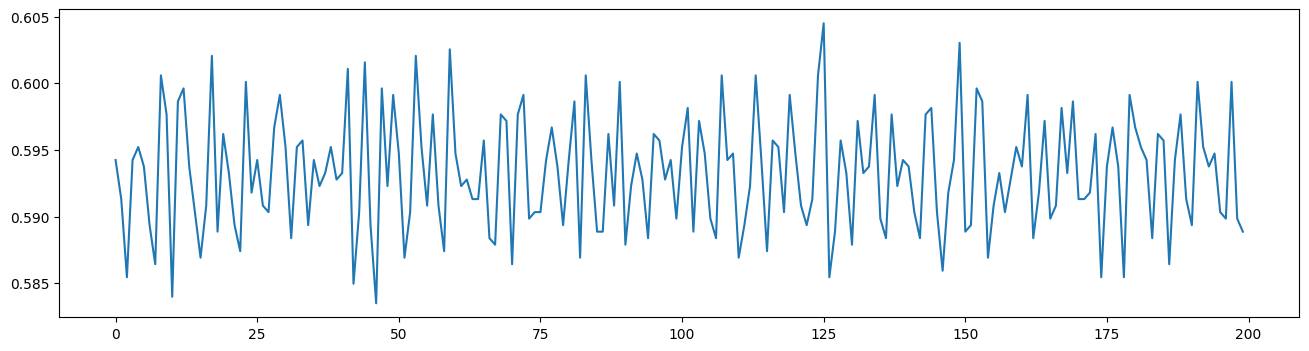

In [ ]:
N=2048
k = 8
C = []
for u in range(N):
    C += [[]]
    for ki in range(k//2):
        C[u] += [u+ki+1, u-(ki+1)]
C = np.array(C)
C[np.where(C < 0)] += N
C[np.where(C >= N)] -= N

# Rewiring
omega = 0.0  # rewire 10% of the connections
all_nodes = set(range(N))

for node in range(N):
    for ki in range(k):
        # rewire
        if np.random.random() < omega:
            available_nodes = list(all_nodes - set(list(C[node]) + [node]))
            C[node][ki] = np.random.choice(available_nodes)


x = bernoulli.rvs(p=0.5, size=N)  # neural states

activity = [x.mean()]

#print(x)
S = bernoulli.rvs(p=0.5, size=(N, k))*2-1  # (C) connections weihgts

time = 1000

for t in range(time):
    x_t = x.copy()  # update with previous state
    for ni in range(N):
        x[ni] = int((x_t[C[ni]]*S[ni]).sum() >= 0)
    #print(x)
    activity += [x.mean()]

plt.figure(figsize=(16,4))
plt.plot(activity[-200:])

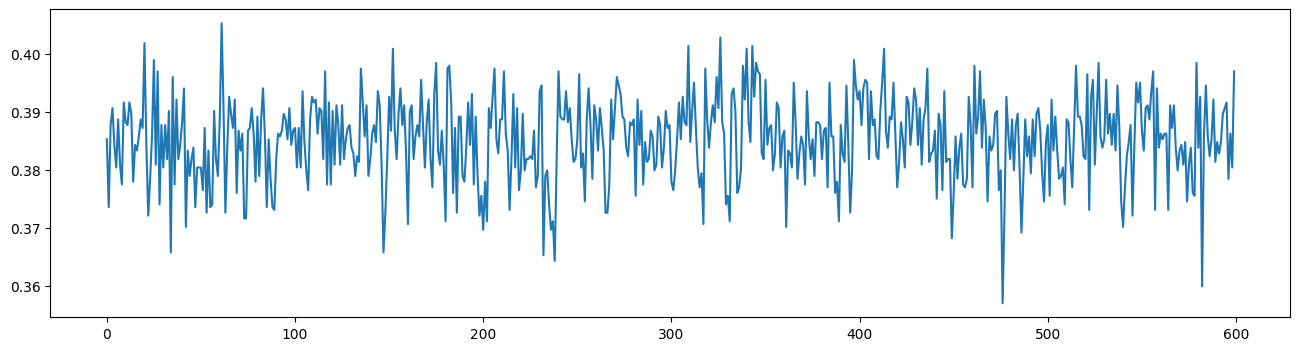

In [ ]:
N=2048
k = 8
C = []
for u in range(N):
    C += [[]]
    for ki in range(k//2):
        C[u] += [u+ki+1, u-(ki+1)]
C = np.array(C)
C[np.where(C < 0)] += N
C[np.where(C >= N)] -= N

# Rewiring
omega = 1.0  # rewire 10% of the connections
all_nodes = set(range(N))

for node in range(N):
    for ki in range(k):
        # rewire
        if np.random.random() < omega:
            available_nodes = list(all_nodes - set(list(C[node]) + [node]))
            C[node][ki] = np.random.choice(available_nodes)


x = bernoulli.rvs(p=0.5, size=N)  # neural states

activity = [x.mean()]

#print(x)
S = bernoulli.rvs(p=0.5, size=(N, k))*2-1  # (C) connections weihgts

time = 1000

for t in range(time):
    x_t = x.copy()  # update with previous state
    for ni in range(N):
        x[ni] = int((x_t[C[ni]]*S[ni]).sum() > 0)
    #print(x)
    activity += [x.mean()]

plt.figure(figsize=(16,4))
plt.plot(activity[-600:])

Final neuron states: [1 1 0 ... 1 1 1]


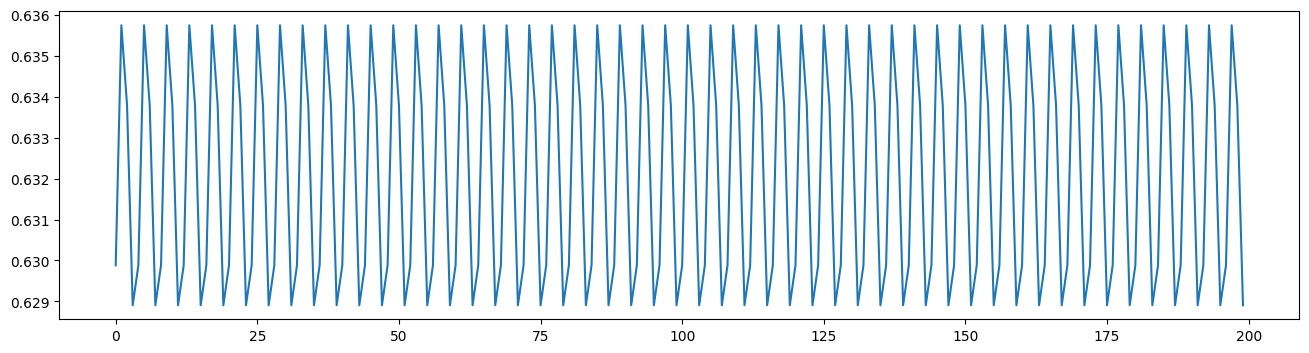

In [ ]:
# -*- coding: utf-8 -*-
"""S2 05-04-2023.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/18YkG5_KKz1up_Ol4lZU06nyHVd_rkM30

# Semana 2: 05-04-2023
## Intro

# Grafo de Erdös - Rénji
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli#returns 1 or 0 with a probability of 1
import seaborn as sns

N = 10  # Nodos
k = 2  # Average connections per node (max is N-1)
p = k / N #Probability of connection

#Connects points a and b with an arrow, hw is headWidth
def drawEdge(a, b, hw=0):
  plt.arrow(a[0], a[1], b[0] - a[0], b[1] - a[1], 
            head_width = hw, length_includes_head = True, color="green"
            )

#Regular ring, one neighbor before one after
N=10
k=4
rConns = []
for u in range(N):
  rConns += [[]]
  for ki in range(k//2):#// int division
    rConns[u] += [u+ki+1, u-(ki+1)]#+1 so there are no self connections
rConns = np.array(rConns)
rConns

#There cant be 10s or -1s
rConns[np.where(rConns < 0)] += N
rConns[np.where(rConns >= N)] -= N
rConns

ringEdges = []
for ni in range(N): 
    for v in rConns[ni]:
        ringEdges += [(ni, v)]
ringEdges



adjMatrix = np.zeros((N, N), dtype='int')
for ni, v in enumerate(rConns):
  for vi in v:
    adjMatrix[ni][vi] = 1
adjMatrix

N=11
k = 4
C = []
for u in range(N):
    C += [[]]
    for ki in range(k//2):
        C[u] += [u+ki+1, u-(ki+1)]
rConns = np.array(C)
rConns[np.where(rConns < 0)] += N
rConns[np.where(rConns >= N)] -= N

R = rConns.copy()
omega = 0.1#rewire x% of connections
rConns

allNodes = set(range(N))
for node in range(N):
  for neighbor in range(k):
    if np.random.random() < omega:
      availableNodes = list(allNodes - set(list(rConns[node])+[node]))#Get all nodes not connected to node
      rConns[node][neighbor] = np.random.choice(availableNodes)

adjMatrix = np.zeros((N, N), dtype='int')
for ni, v in enumerate(rConns):
  for vi in v:
    adjMatrix[ni][vi] = 1
adjMatrix

def draw_edge(a, b, ni, nj, hw=0, color='green'):
    # Connects points a and b with an arrow: a-->b
    plt.arrow(a[0], a[1], b[0] - a[0], b[1] - a[1], 
              head_width = hw, length_includes_head = True, color=color
              )

def plot_circular_layout(adj_list, hw=0.0, rewired_arcs=None):

    t = np.linspace(0, 2*np.pi, N, endpoint=False)

    x = np.cos(t)
    y = np.sin(t)

    plt.figure(figsize=(6,6))
    plt.plot(x, y, '.', ms=30)
    plt.axis('off')
    for i in range(N):
        plt.text(x[i]-0.015, y[i]-0.015, i, c='w')
    e = [draw_edge([x[a], y[a]], [x[b], y[b]], a, b, hw) 
         for a in adj_list for b in adj_list[a] if len(adj_list[a])]
    
    if rewired_arcs is not None:
        e = [draw_edge([x[a], y[a]], [x[b], y[b]], a, b, 0.06, color="red") 
         for a in rewired_arcs for b in rewired_arcs[a] if len(rewired_arcs[a])]

adj_list = {node: neighbors for node, neighbors in enumerate(rConns)}

rewired_arcs = {i: list(set(rConns[i])-set(R[i])) for i in range(N)}


x = bernoulli.rvs(p=0.5, size=N)#neurons' states
S = bernoulli.rvs(p=0.5, size=(N, k))*2-1#connectivity matriz has the same size as the weights matrix (S)
x, S

#Neighbors of node 0, state of the neighbors, weight of those connections, multiplication of node state and weight, sum of inputs into node 0
rConns[0], x[rConns[0]], S[0], x[rConns[0]]*S[0], (x[rConns[0]]*S[0]).sum()

#Node 0 current state
x[0]

#Ring connections
N=1024
k = 4
rConns = []
for u in range(N):
    rConns += [[]]
    for ki in range(k//2):
        rConns[u] += [u+ki+1, u-(ki+1)]
rConns = np.array(rConns)
rConns[np.where(rConns < 0)] += N
rConns[np.where(rConns >= N)] -= N

#Rewiring
omega = 1#rewire x% of connections
allNodes = set(range(N))
for node in range(N):
  for neighbor in range(k):
    if np.random.random() < omega:
      availableNodes = list(allNodes - set(list(rConns[node])+[node]))#Get all nodes not connected to node
      rConns[node][neighbor] = np.random.choice(availableNodes)
#Neuron states
x = bernoulli.rvs(p=0.5, size=N)  # neural states
activity = [x.mean()]
S = bernoulli.rvs(p=0.5, size=(N, k))*2-1  # (C) connections weights
time = 1000
for t in range(time):
  xT = x.copy()#Update with previous state
  for ni in range(N):#Update every neuron
    x[ni] = int((xT[rConns[ni]]*S[ni]).sum() >= 0)#Change neuron state according to neighbor inputs and connections weights
  activity += [x.mean()]
  #print("Neuron change step {0}: {1}".format(t+1, x))
print("Final neuron states: {0}".format(x))
#Neural activity
plt.figure(figsize=(16,4))
plt.plot(activity[-200:])



In [ ]:
N = 1000 # Pattern size, and network size (nodes)
k = 100
C = []
for u in range(N):
    C += [[]]
    for ki in range(k//2):
        C[u] += [u+ki+1, u-(ki+1)]
C = np.array(C)
C[np.where(C < 0)] += N
C[np.where(C >= N)] -= N

# Learn a set of random patterns

P = 5

patterns = bernoulli.rvs(p=0.5, size=(P, N))*2-1
patterns

array([[ 1, -1,  1, ..., -1,  1,  1],
       [-1, -1, -1, ...,  1, -1,  1],
       [-1,  1, -1, ...,  1, -1,  1],
       [ 1,  1,  1, ...,  1, -1, -1],
       [ 1,  1,  1, ..., -1,  1,  1]])

In [ ]:
W = np.zeros(np.shape(C))
pi = patterns[0]
for pi in patterns:
    for ni in range(N):
        #print(pi[ni], pi[C[ni]], pi[ni]*pi[C[ni]])
        W[ni] += pi[ni]*pi[C[ni]]
    #print(W)
C, W

(array([[  1, 999,   2, ..., 951,  50, 950],
        [  2,   0,   3, ..., 952,  51, 951],
        [  3,   1,   4, ..., 953,  52, 952],
        ...,
        [998, 996, 999, ..., 948,  47, 947],
        [999, 997,   0, ..., 949,  48, 948],
        [  0, 998,   1, ..., 950,  49, 949]]),
 array([[ 1., -1.,  5., ..., -3., -1.,  3.],
        [ 1.,  1.,  1., ..., -1., -3.,  1.],
        [ 1.,  1., -3., ..., -1.,  1., -1.],
        ...,
        [-5.,  1., -1., ...,  1., -3.,  3.],
        [ 1., -5.,  3., ..., -3., -1., -1.],
        [-1.,  1., -1., ...,  1.,  1., -3.]]))

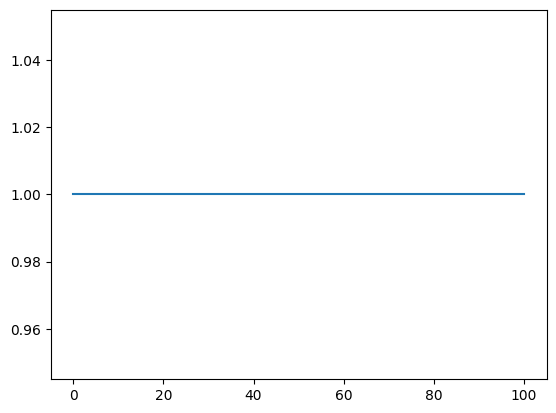

In [ ]:
# net state equal to first parttern

pi = patterns[0].copy()
x = pi.copy()

m = []

time = 100

m = [(x*pi).mean()]

for t in range(time):
    
    x_t = x.copy()  # update with previous state
    for ni in range(N):
        x[ni] = int((x_t[C[ni]]*W[ni]).sum() >= 0)*2-1
    m += [np.abs((x*pi).mean())]
plt.plot(m)

In [ ]:
p0 = patterns[0]  # primer patron
p1 = patterns[1]
pi
(p0*p1).mean()

-0.0132

In [ ]:
k << N

array([[-1,  1,  1,  1,  1, -1,  1,  1,  1, -1],
       [ 1, -1, -1,  1, -1, -1,  1,  1, -1,  1],
       [ 1, -1, -1, -1, -1,  1,  1,  1,  1, -1],
       [-1, -1, -1, -1,  1, -1, -1, -1,  1,  1],
       [-1, -1,  1,  1,  1, -1,  1,  1,  1, -1]])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cce3455d-da08-4c10-a6fe-39f2a30c6a51' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>